In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from importlib.resources import path
import numpy as np
import matplotlib.pyplot as plt

In [45]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


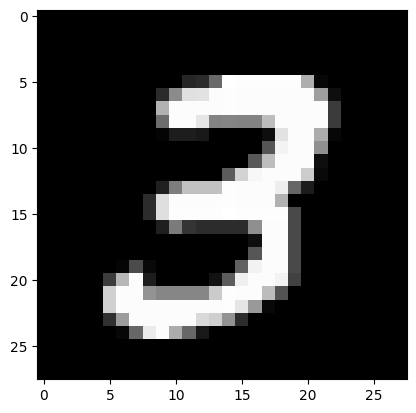

In [54]:
plt.imshow(X_train[7], cmap="gray")
plt.show()

Here I am normalizing the data instead of being form 0 to 255 I am making it between 0 and 1

In [56]:
from tensorflow.keras.utils import normalize


X_train = normalize(X_train, axis=1)
x_test = normalize(x_test, axis=1)

Here we I will create the neural network that I will train to classify the digits.

In [57]:
model = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10)
])

Now after creating the neural network, I will train it on the MNIST dataset

In [84]:
from pickletools import optimize


model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True)
)

model.fit(
    X_train, 
    Y_train,
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0099
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0070
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0071
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0082
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0054
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0070
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0057
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0099
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0054
Epoch 11/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0070
Epoch 12/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0071
E

Here we will store the predicitons from the test dataset. 

In [85]:
predictions = model.predict([x_test])

313/313 [==============================] - 1s 1ms/step


Here we are trying to display the results of some predictions.

9


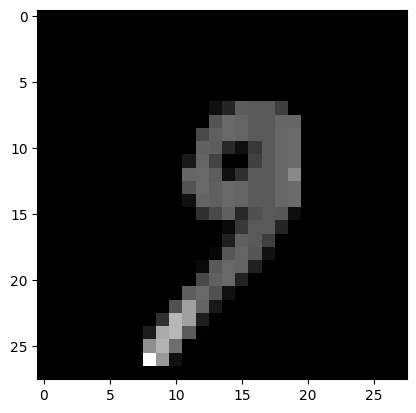

In [86]:
print(np.argmax(predictions[1000]))
plt.imshow(x_test[1000], cmap='gray')
plt.show()

Finally, here is the accuracy of the model:

In [87]:
model_loss = model.evaluate(X_train, Y_train)
model_accuracy = (1 - model_loss) * 100

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0055


In [88]:
print(f'the accuracy of my model is: {model_accuracy}%')

the accuracy of my model is: 99.44687015376985%
